In [ ]:
!pip install wordcloud nltk --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import random
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('polish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
os.makedirs("output", exist_ok=True)



In [ ]:
train_df = pd.read_csv("v1_training.csv")
test_df = pd.read_csv("v1_test.csv")



In [ ]:
train_df["split"] = "train"
test_df["split"] = "test"

df = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
total = len(df)
train_count = len(train_df)
test_count = len(test_df)

general_counts = df['GENERAL TAG'].value_counts().sort_index()
specific_counts = df['SPECIFIC TAG'].value_counts().sort_index()

In [ ]:
df['char_len'] = df['TEXT'].apply(lambda x: len(str(x)))
df['word_len'] = df['TEXT'].apply(lambda x: len(str(x).split()))
length_stats = df.groupby('GENERAL TAG')[['char_len', 'word_len']].mean()

In [ ]:
with open("output/statistics_report.txt", "w", encoding="utf-8") as f:
    f.write(f"Total tweets: {total}\n")
    f.write(f"Train set: {train_count} tweets ({train_count/total:.2%})\n")
    f.write(f"Test set: {test_count} tweets ({test_count/total:.2%})\n\n")
    f.write("General Tag distribution:\n")
    for tag, count in general_counts.items():
        f.write(f"  Tag {tag}: {count} ({count/total:.2%})\n")
    f.write("\nSpecific Tag distribution:\n")
    for tag, count in specific_counts.items():
        f.write(f"  Tag {tag}: {count} ({count/total:.2%})\n")
    f.write("\nAverage text lengths by GENERAL TAG:\n")
    for tag, row in length_stats.iterrows():
        f.write(f"  Tag {tag} -> avg. characters: {row['char_len']:.2f}, avg. words: {row['word_len']:.2f}\n")

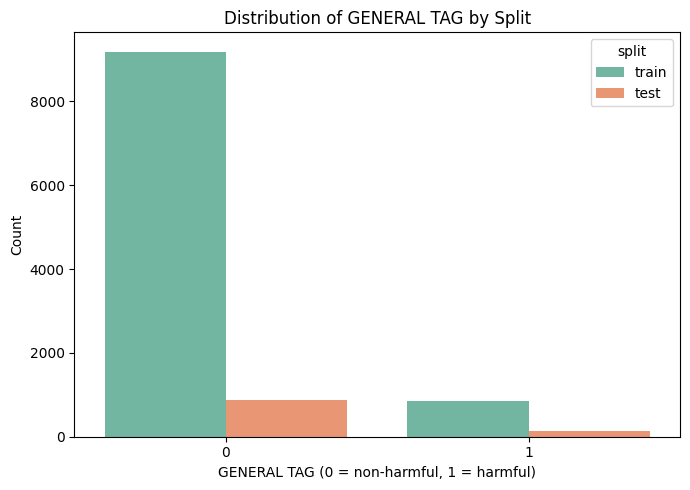

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='GENERAL TAG', hue='split', palette='Set2')
plt.title("Distribution of GENERAL TAG by Split")
plt.xlabel("GENERAL TAG (0 = non-harmful, 1 = harmful)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("output/general_tag_distribution.png")
plt.show()

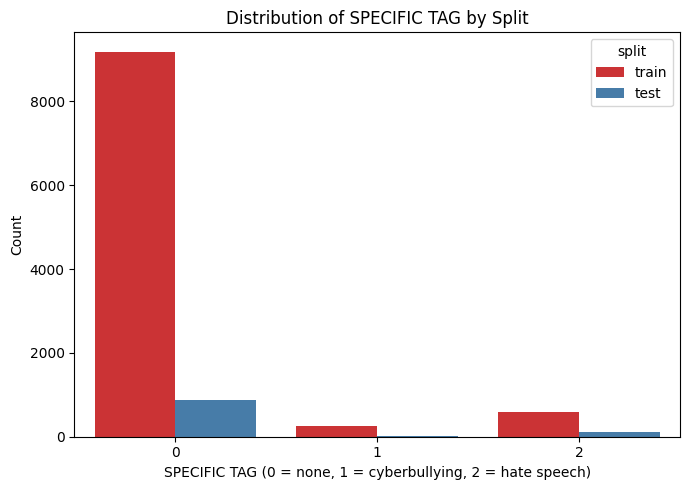

In [146]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='SPECIFIC TAG', hue='split', palette='Set1')
plt.title("Distribution of SPECIFIC TAG by Split")
plt.xlabel("SPECIFIC TAG (0 = none, 1 = cyberbullying, 2 = hate speech)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("output/specific_tag_distribution.png")
plt.show()

In [ ]:
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return " ".join([word for word in words if word not in stop_words and len(word) > 2])

In [151]:
def generate_wordcloud(texts, title, filename):
    cleaned_texts = [preprocess_text(t) for t in texts if isinstance(t, str)]
    all_text = " ".join(cleaned_texts)
    wc = WordCloud(width=1000, height=500, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(f"output/{filename}.png")
    plt.show()

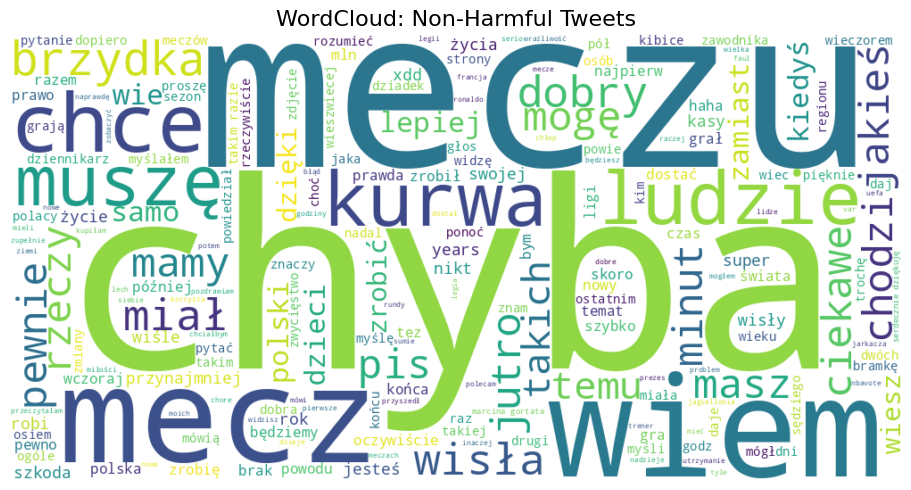

In [ ]:
generate_wordcloud(df[df["GENERAL TAG"] == 0]["TEXT"], "WordCloud: Non-Harmful Tweets", "wordcloud_nonharmful")

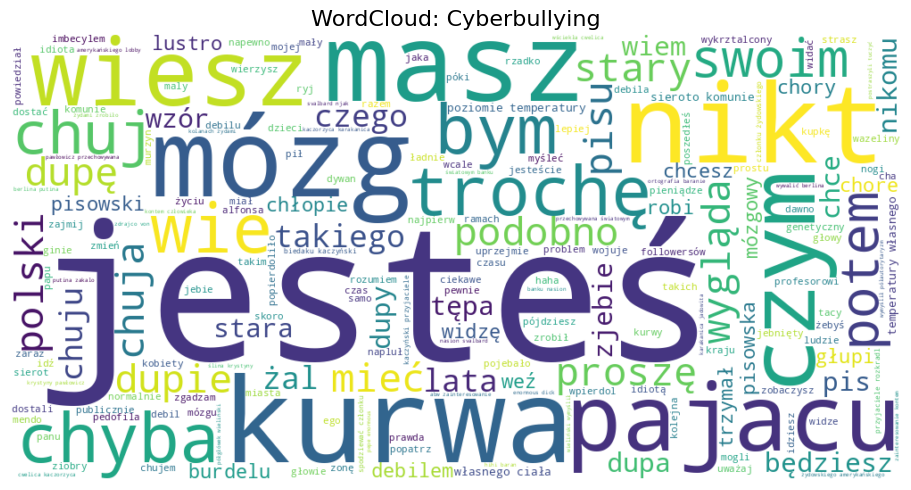

In [153]:
generate_wordcloud(df[df["SPECIFIC TAG"] == 1]["TEXT"], "WordCloud: Cyberbullying", "wordcloud_cyberbullying")

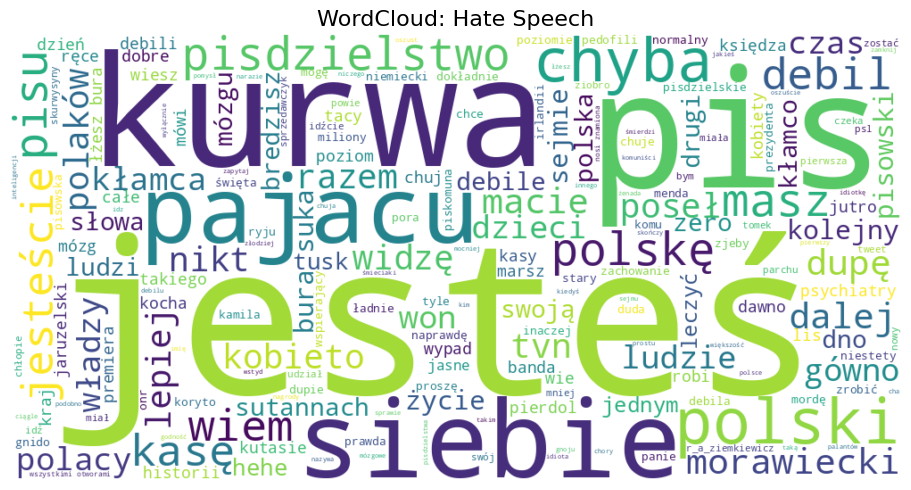

In [154]:
generate_wordcloud(df[df["SPECIFIC TAG"] == 2]["TEXT"], "WordCloud: Hate Speech", "wordcloud_hatespeech")

In [158]:
print("\n🔵 Przykładowe tweety (GENERAL TAG = 0):\n")
non_harmful = train_df[train_df["GENERAL TAG"] == 0][["TEXT", "GENERAL TAG", "SPECIFIC TAG"]]
non_harmful.head(5)


🔵 Przykładowe tweety (GENERAL TAG = 0):



,TEXT,GENERAL TAG,SPECIFIC TAG
0,Dla mnie faworytem do tytułu będzie Cracovia. ...,0,0
1,@daria_utf @Jagiellonia1920 Brawo ty Daria kib...,0,0
2,"@PremierRP @MorawieckiM Super, polski premier ...",0,0
3,@nopawel @90minut_pl Musi. Innej drogi nie mamy.,0,0
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0,0


In [ ]:
print("\n🔴 Przykładowe tweety (GENERAL TAG = 1):\n")
harmful = train_df[train_df["GENERAL TAG"] == 1][["TEXT", "GENERAL TAG", "SPECIFIC TAG"]]
harmful.head(5)


🔴 Przykładowe tweety (GENERAL TAG = 1):



,TEXT,GENERAL TAG,SPECIFIC TAG
9,@trym28 @BLewak @Phil_Backensky Gdzie jest @Po...,1,2
21,@MalgorzataW5 @tvn24 No to Skończmy kurwa z ty...,1,2
39,#Woronicza 17 poseł Halicki oburzony za Bolka....,1,2
44,@MarcinPo3 @tvp_info @KurskiPL Jak narazie to ...,1,1
53,Nikt nigdy nie rozsiewał takiego smrodu jak @K...,1,1
